In [3]:
#import neccesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import emoji
import collections
from collections import Counter
import re
from wordcloud import WordCloud
from nltk.util import ngrams

In [4]:
#read in dataset
df = pd.read_csv('youtube_toxic_comments_cleaned_data.csv')
print(f"data has {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

data has 1000 rows and 5 columns


,corpus_name,raw_sentence,label,clean_sentence_training,clean_sentence_EDA
0,youtube_toxic_comments,If only people would just take a step back and...,0,If only people would just take a step back and...,If only people would just take a step back and...
1,youtube_toxic_comments,Law enforcement is not trained to shoot to app...,1,Law enforcement is not trained to shoot to app...,Law enforcement is not trained to shoot to app...
2,youtube_toxic_comments,\nDont you reckon them 'black lives matter' ba...,1,Dont you reckon them black lives matter banner...,Dont you reckon them black lives matter banner...
3,youtube_toxic_comments,There are a very large number of people who do...,0,There are a very large number of people who do...,There are a very large number of people who do...
4,youtube_toxic_comments,"The Arab dude is absolutely right, he should h...",0,The Arab dude is absolutely right he should ha...,The Arab dude is absolutely right he should ha...


In [5]:
pd.set_option('display.max_rows', None)

In [6]:
# let us open the file

dataset = pd.read_csv("youtube_toxic_comments_cleaned_data.csv")
dataset.sample(1000)

,corpus_name,raw_sentence,label,clean_sentence_training,clean_sentence_EDA
512,youtube_toxic_comments,When did coming towards the officer is the sam...,0,When did coming towards the officer is the sam...,When did coming towards the officer is the sam...
170,youtube_toxic_comments,Yep a Muslim bitch,1,Yep a Muslim bitch,Yep a Muslim bitch
519,youtube_toxic_comments,Michael Brown would not have been going to col...,1,Michael Brown would not have been going to col...,Michael Brown would not have been going to col...
579,youtube_toxic_comments,The protesters look like kids (16-22?) I won...,0,The protesters look like kids I wonder if anyo...,The protesters look like kids I wonder if anyo...
151,youtube_toxic_comments,"people get shot everyday, how come this is the...",0,people get shot everyday how come this is the ...,people get shot everyday how come this is the ...
858,youtube_toxic_comments,Crimes committed during a Riot should become a...,0,Crimes committed during a Riot should become a...,Crimes committed during a Riot should become a...
501,youtube_toxic_comments,"Obviously rapping isn't in itself a crime, or ...",0,Obviously rapping isnt in itself a crime or on...,Obviously rapping isnt in itself a crime or on...
404,youtube_toxic_comments,I loved your Trayvon Martin video and I love t...,0,I loved your Trayvon Martin video and I love t...,I loved your Trayvon Martin video and I love t...
915,youtube_toxic_comments,They don't want justice. Here you see a mob m...,1,They dont want justice Here you see a mob ment...,They dont want justice Here you see a mob ment...
509,youtube_toxic_comments,The white race is the racist race.,1,The white race is the racist race,The white race is the racist race


In [7]:
samples_1000 = dataset.sample(1000)




In [8]:
samples_1000.loc[0]['clean_sentence_EDA']

'If only people would just take a step back and not make this case about them because it wasnt about anyone except the two people in that situation To lump yourself into this mess and take matters into your own hands makes these kinds of protests selfish and without rational thought and investigation The guy in this video is heavily emotional and hyped up and wants to be heard and when he gets heard he just presses more and more He was never out to have a reasonable discussion Kudos to the Smerconish for keeping level the whole time and letting Masri make himself out to be a fool How dare he and those that tore that city down in protest make this about themselves and to dishonor the entire incident with their own hate By the way since when did police brutality become an epidemic I wish everyone would just stop pretending like they were there and they knew EXACTLY what was going on because theres no measurable amount of people that honestly witnessed this incident so none of us have a c

In [9]:
samples_1000.loc[1]['clean_sentence_EDA']

'Law enforcement is not trained to shoot to apprehend They are trained to shoot to kill And I thank Wilson for killing that punk bitch'

In [10]:
samples_1000.loc[2]['clean_sentence_EDA']

'Dont you reckon them black lives matter banners being held by white cunts is kinda patronizing and ironically racist could they have not come up with somethin better or is it just what white folks do to give them selves pride ooo look at me im being nice for the black people why does it always have to be about race actually the whole world is pussyfootin around for fear of being racist its fuckin daft man'

In [26]:
#select only relevant columns

df_eda = df[['clean_sentence_EDA','label']]

In [27]:
#rename column for ease of use

df_eda = df_eda.rename(columns={'clean_sentence_EDA':'text'})

In [28]:
#distribution of data for the label categories

(df_eda['label'].value_counts(normalize=True))*100

0    53.8
1    39.4
2     6.8
Name: label, dtype: float64

# GENERAL EDA

In [29]:
#function to process the count of the tweets

def create_word_counts(df):
    """
    Creates features based on the words

    Input
    ------
    df : pandas dataframe
           dataframe of all the data
    Returns
    -------
    df: pandas dataframe
        dataframe containing the various word features
    """
    df['text']=df['text'].astype(str)
    df['word_count'] = df['text'].apply(lambda x : len(x.split()))
    df['character_count'] = df['text'].apply(lambda x : len(x.replace(" ","")))
    df['word_density'] = df['word_count'] / (df['character_count'] + 1)
    return df

In [30]:
df_eda = create_word_counts(df_eda)

In [31]:
df_eda['word_count'].describe()

count    1000.000000
mean       33.246000
std        48.228679
min         1.000000
25%         8.000000
50%        19.000000
75%        39.000000
max       800.000000
Name: word_count, dtype: float64

In [32]:
df_eda['character_count'].describe()

count    1000.000000
mean      144.797000
std       211.037823
min         3.000000
25%        37.000000
50%        78.000000
75%       168.000000
max      3386.000000
Name: character_count, dtype: float64

In [33]:
df_eda['word_count'].describe()

count    1000.000000
mean       33.246000
std        48.228679
min         1.000000
25%         8.000000
50%        19.000000
75%        39.000000
max       800.000000
Name: word_count, dtype: float64

In [34]:
#univariate analysis of counts of words and characters

total_num_words = np.sum(df_eda['word_count'])
total_num_characters = np.max(df_eda['character_count'])
total_num_unique_words = len(np.unique(df_eda['word_count']))
total_num_unique_characters = len(np.unique(df_eda['character_count']))
average_length_of_words = np.mean(df_eda['word_count'])
average_length_of_characters = np.mean(df_eda['character_count'])


print(f'Total number of words in the dataset: {total_num_words} words.')
print(f'Total number of characters in the dataset: {total_num_characters} characters.')
print(f'Total number of unique words in the dataset: {total_num_unique_words} words.')
print(f'Total number of unique characters in the dataset: {total_num_unique_characters} characters.')
print(f'Average number of words in the dataset: {average_length_of_words} words.')
print(f'Average number of characters in the dataset: {average_length_of_characters} characters.')

Total number of words in the dataset: 33246 words.
Total number of characters in the dataset: 3386 characters.
Total number of unique words in the dataset: 147 words.
Total number of unique characters in the dataset: 343 characters.
Average number of words in the dataset: 33.246 words.
Average number of characters in the dataset: 144.797 characters.


In [35]:
#tokenize the texts

words = [word_tokenize(str(sentence)) for sentence in df_eda['text']]

In [36]:
#flatten the list to obtain single list

word = [item for word in words for item in word]

In [37]:
#function to check for emojis

def extract_emojis(s):
    """Checks if there are any emojis present

    Args:
        s (pandas series): column containing the texts
    Returns:
        result (list) : list containing emoji values if present, if not, empty string
    """    
    result= ''.join(c for c in s if c in emoji.EMOJI_DATA)
    return result

In [38]:
# 25 most common words

most_common = Counter(word).most_common(25)
print(most_common)

[('the', 1403), ('to', 802), ('and', 763), ('a', 761), ('of', 587), ('is', 523), ('that', 430), ('in', 422), ('you', 378), ('I', 374), ('are', 311), ('this', 284), ('was', 258), ('it', 251), ('people', 242), ('for', 242), ('not', 221), ('they', 219), ('have', 210), ('on', 205), ('be', 202), ('black', 199), ('with', 195), ('he', 181), ('all', 180)]


In [39]:
#extract the word and the frequence count

words = [word for word, count in most_common]
frequency = [count for word, count in most_common]

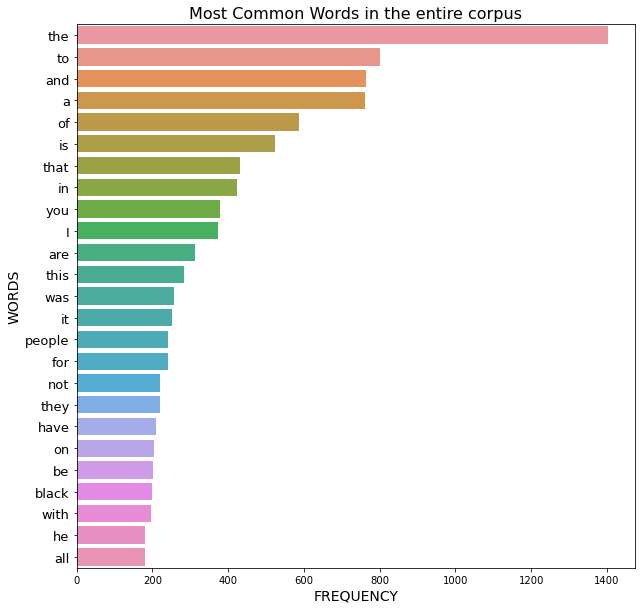

In [40]:
#plot the 25 most common words

plt.figure(figsize=(10,10))
plt.title("Most Common Words in the entire corpus",fontsize=16)
plt.ylabel('WORDS',fontsize=14)
plt.xlabel('FREQUENCY',fontsize=14)
plt.yticks(fontsize=13)
sns.barplot(x = frequency, y = words);

In [41]:
#tokenize, flatten the list, remove all words less than 3 letters and find the 25 most common


words = [word_tokenize(str(sentence)) for sentence in df_eda['text']]
words_list = [item for word in words for item in word]
words_clean = [word for word in words_list if len(word)>=3]
most_common = Counter(words_clean).most_common(25)

In [42]:
# 25 most common words now

most_common = Counter(words_clean).most_common(25)

In [21]:
#extract the word and the frequence count

words = [word for word, count in most_common]
frequency = [count for word, count in most_common]

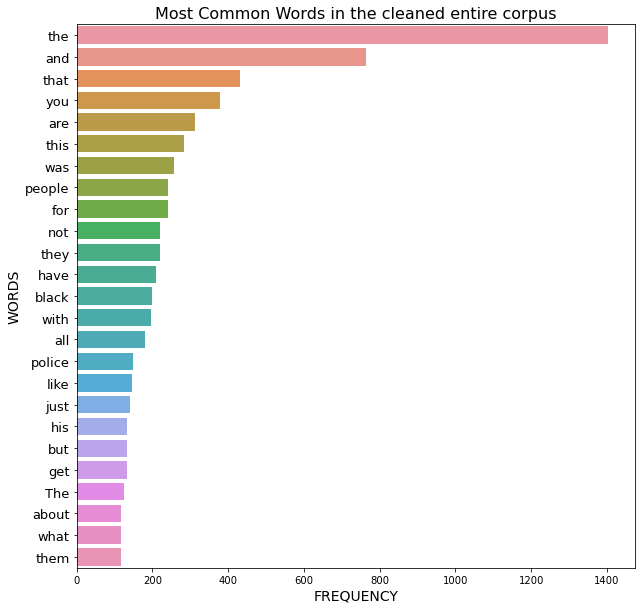

In [22]:
#plot the 25 most common words with words less than 3 letters removed

plt.figure(figsize=(10,10))
plt.title("Most Common Words in the cleaned entire corpus",fontsize=16)
plt.ylabel('WORDS',fontsize=14)
plt.xlabel('FREQUENCY',fontsize=14)
plt.yticks(fontsize=13)
sns.barplot(x = frequency, y = words);

# Label Partition EDA

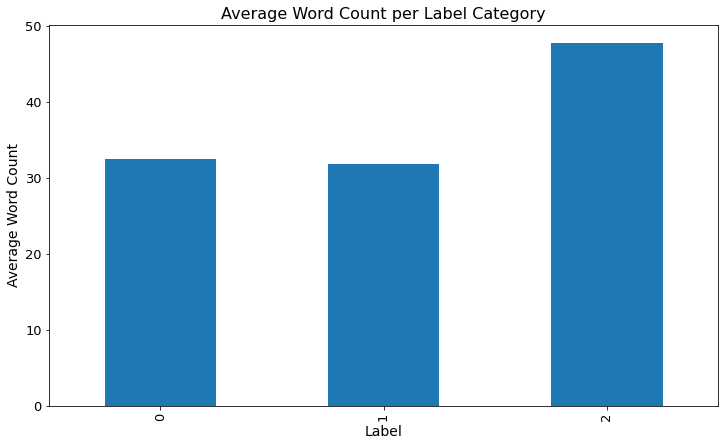

In [23]:
#plot the average number of words for each label category

plt.figure(figsize=(12,7))
df_eda.groupby('label')['word_count'].mean().plot(kind='bar')
plt.title("Average Word Count per Label Category",fontsize=16)
plt.xlabel('Label',fontsize=14)
plt.ylabel('Average Word Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

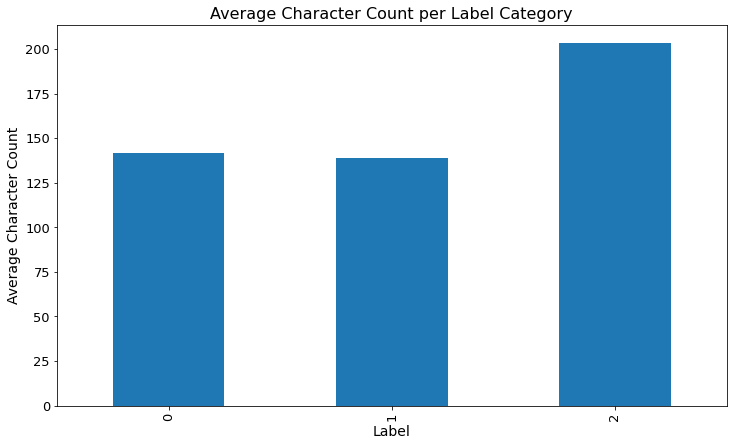

In [24]:
#plot the average number of characters for each label category
plt.figure(figsize=(12,7))
df_eda.groupby('label')['character_count'].mean().plot(kind='bar')
plt.title("Average Character Count per Label Category",fontsize=16)
plt.xlabel('Label',fontsize=14)
plt.ylabel('Average Character Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [25]:
#create individual dataset for each of the categories

non_risky = df_eda[df_eda['label'] == 0]
potentially_risky = df_eda[df_eda['label'] == 1]
risky = df_eda[df_eda['label'] == 2]

In [26]:
#apply the create word counts function to each of the datasets


non_risky = create_word_counts(non_risky)
potentially_risky = create_word_counts(potentially_risky)
risky = create_word_counts(risky)

C:\Users\Mahmud\AppData\Local\Temp\ipykernel_7760\3028982184.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']=df['text'].astype(str)
C:\Users\Mahmud\AppData\Local\Temp\ipykernel_7760\3028982184.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['text'].apply(lambda x : len(x.split()))
C:\Users\Mahmud\AppData\Local\Temp\ipykernel_7760\3028982184.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [27]:
#checking the number of unique words for each dataset


print(f"There are {len(np.unique(non_risky['word_count']))} unique words in the non-risky texts category")
print(f"There are {len(np.unique(potentially_risky['word_count']))} unique words in the potential risky texts category")
print(f"There are {len(np.unique(risky['word_count']))} unique words in the risky texts category")

There are 118 unique words in the non-risky texts category
There are 97 unique words in the potential risky texts category
There are 48 unique words in the risky texts category


In [28]:
non_risky['word_count'].describe()

count    538.000000
mean      32.483271
std       44.445693
min        1.000000
25%        8.000000
50%       18.000000
75%       38.000000
max      403.000000
Name: word_count, dtype: float64

In [29]:
potentially_risky['word_count'].describe()

count    394.000000
mean      31.789340
std       51.220461
min        1.000000
25%        8.250000
50%       19.000000
75%       37.000000
max      800.000000
Name: word_count, dtype: float64

In [30]:
risky['word_count'].describe()

count     68.000000
mean      47.720588
std       56.836200
min        2.000000
25%       15.000000
50%       29.000000
75%       57.750000
max      289.000000
Name: word_count, dtype: float64

In [31]:
#creating new column containing the name of the dataframe itself to be used later 


non_risky = non_risky.assign(df_name = lambda x:'Non_Risky')
potentially_risky = potentially_risky.assign(df_name = lambda x:'Potentially_Risky')
risky = risky.assign(df_name = lambda x:'Risky')

In [32]:
#removing unneccesary column

non_risky = non_risky.reset_index().drop(columns='index')
risky = risky.reset_index().drop(columns='index')
potentially_risky = potentially_risky.reset_index().drop(columns='index')

In [36]:
#function to create ngrams


def extract_ngrams(data, num):
    """
    Extracts the ngrams from the corpus

    Input
    ------
    data : pandas dataframe
           dataframe of specified label category
    num : int
          number of ngrams(1 for unigram, 2 for bigram etc)
    Returns
    -------
    list of ngrams : list
        list containing the ngrams
    """
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

In [49]:
#function to plot the 20 most common unigrams


def plot_unigram(df):
    """
    Plots the 20 most common unigram of the specified label category dataset

    Input
    ------
    df : pandas dataframe
           dataframe of specified label category
    Returns
    -------
    None
    """
    texts = df['text']
    #apply the extract ngram function
    unigrams = [extract_ngrams(i,1) for i in texts]
    #flatten the list to get the unigram list
    unigram_list = [item for uni in unigrams for item in uni]
    #tokenize each word in the unigram list
    words = [word_tokenize(str(sentence)) for sentence in unigram_list]
    #flatten the list
    words_list = [item for word in words for item in word]
    #select only words with more than 3 letters
    words_clean = [word for word in words_list if len(word)>=3]
    #find 20 most common words
    unigram_most_common = collections.Counter(words_clean).most_common(20)
    words = [''.join(unigram) for unigram, counts in unigram_most_common]
    # get the counts
    counts = [counts for unigram, counts in unigram_most_common]
    counts.sort()
    plt.figure(figsize=(9,8))
    plt.barh(words, counts, color='blue')
    plt.title(f"20 most common Unigram words in Category {df['df_name'][0]}",fontsize=16)
    plt.xlabel('Counts',fontsize=15)
    plt.ylabel('Common Words',fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=14)
    plt.show();

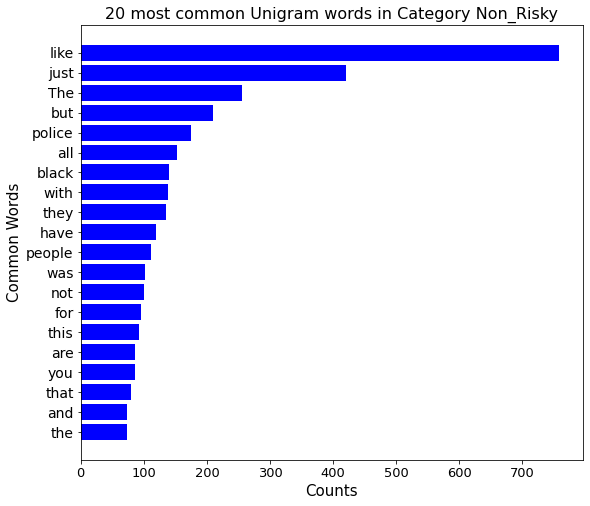

In [50]:
plot_unigram(non_risky)

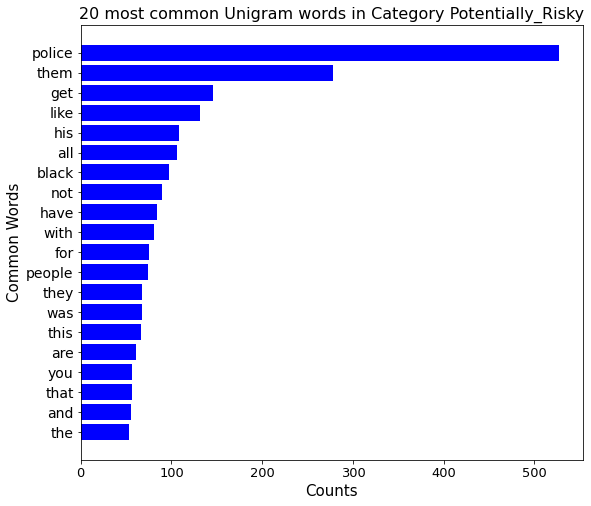

In [51]:
plot_unigram(potentially_risky)

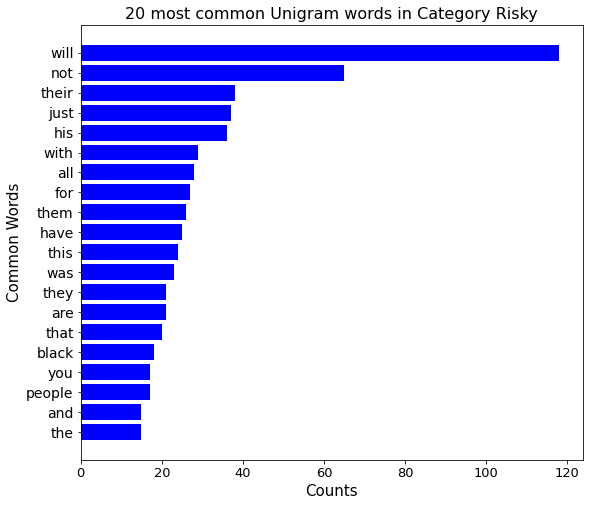

In [52]:
plot_unigram(risky)

In [53]:
def plot_bigram(df):
    """
    Plots the 20 most common bigram of the specified label category dataset

    Input
    ------
    df : pandas dataframe
           dataframe of specified label category
    Returns
    -------
    None
    """
    texts = df['text']
    #apply the extract ngram function
    bigrams = [extract_ngrams(i,2) for i in texts]
    #flatten the list to get the bigram list
    bigram_list = [item for uni in bigrams for item in uni]
    #find 20 most common words
    bigram_most_common = collections.Counter(bigram_list).most_common(20)
    words = [''.join(bigram) for bigram, counts in bigram_most_common]
    # get the counts
    counts = [counts for bigram, counts in bigram_most_common]
    counts.sort()
    plt.figure(figsize=(9,8))
    plt.barh(words, counts, color='blue')
    
    plt.title(f"20 most common Bigram words in Category {df['df_name'][0]}",fontsize=16)
    plt.xlabel('Counts',fontsize=15)
    plt.ylabel('Common Words',fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=14)
    plt.show();

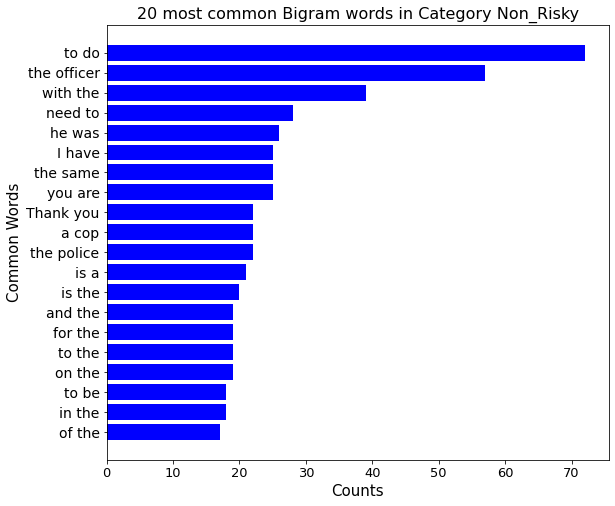

In [54]:
plot_bigram(non_risky)

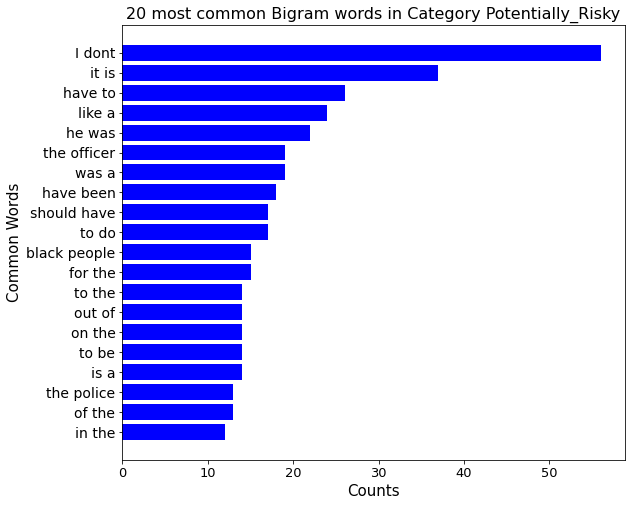

In [55]:
plot_bigram(potentially_risky)

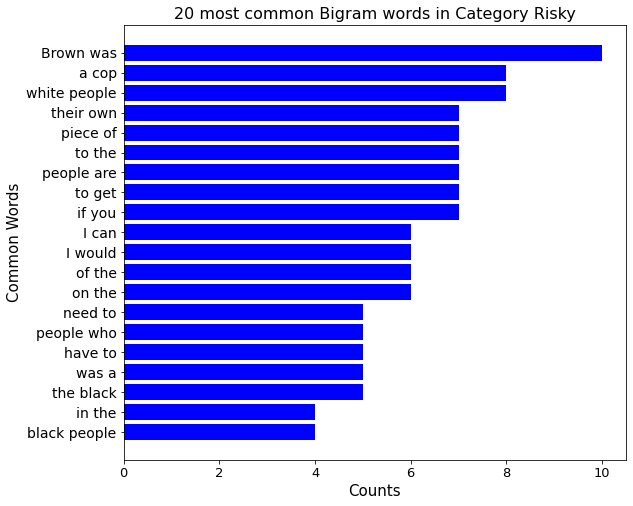

In [57]:
plot_bigram(risky)

In [58]:
def plot_trigram(df):
    """
    Plots the 20 most common trigram of the specified label category dataset

    Input
    ------
    df : pandas dataframe
           dataframe of specified label category
    Returns
    -------
    None
    """
    texts = df['text']
    #apply the extract ngram function
    trigrams = [extract_ngrams(i,3) for i in texts]
    #flatten the list to get the bigram list
    trigram_list = [item for uni in trigrams for item in uni]
    #find 20 most common words
    trigram_most_common = collections.Counter(trigram_list).most_common(20)
    words = [''.join(trigram) for trigram, counts in trigram_most_common]
    # get the counts
    counts = [counts for trigram, counts in trigram_most_common]
    counts.sort()
    plt.figure(figsize=(9,8))
    plt.barh(words, counts, color='blue')
    plt.title(f"20 most common Trigram words in Category {df['df_name'][0]}",fontsize=16)
    plt.xlabel('Counts',fontsize=15)
    plt.ylabel('Common Words',fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=14)
    plt.show();

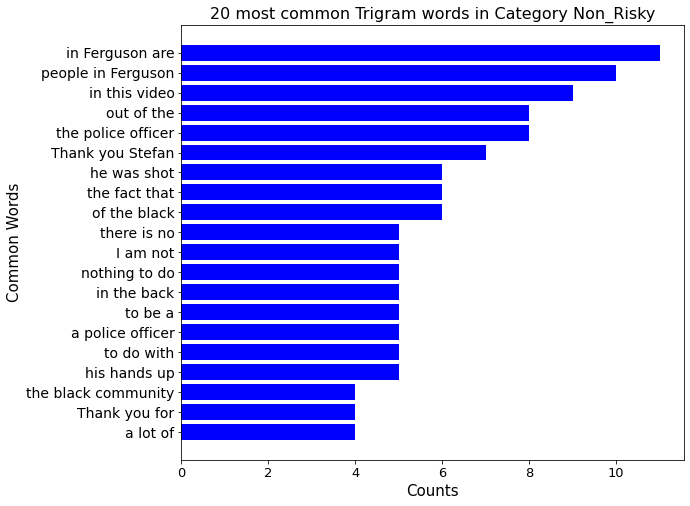

In [59]:
plot_trigram(non_risky)

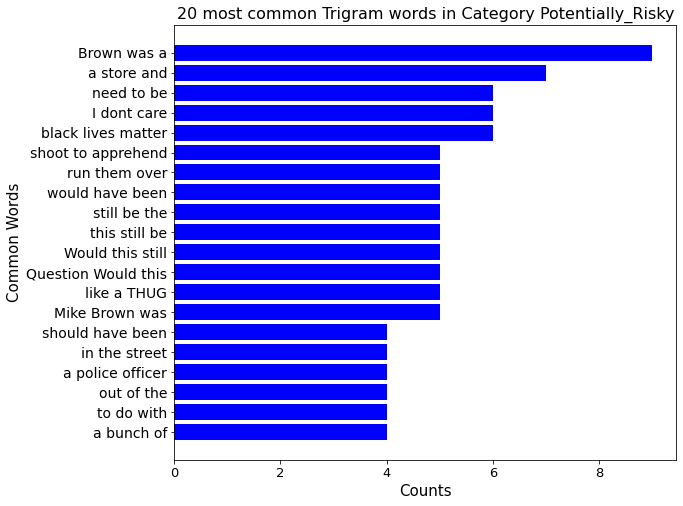

In [60]:
 plot_trigram(potentially_risky)

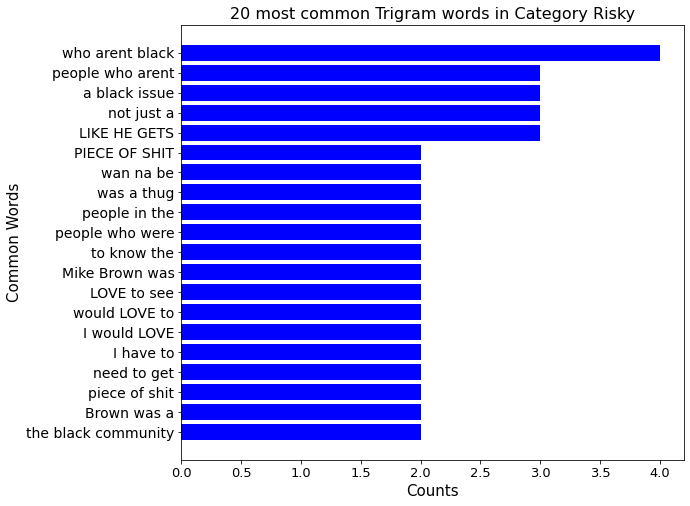

In [61]:
plot_trigram(risky)

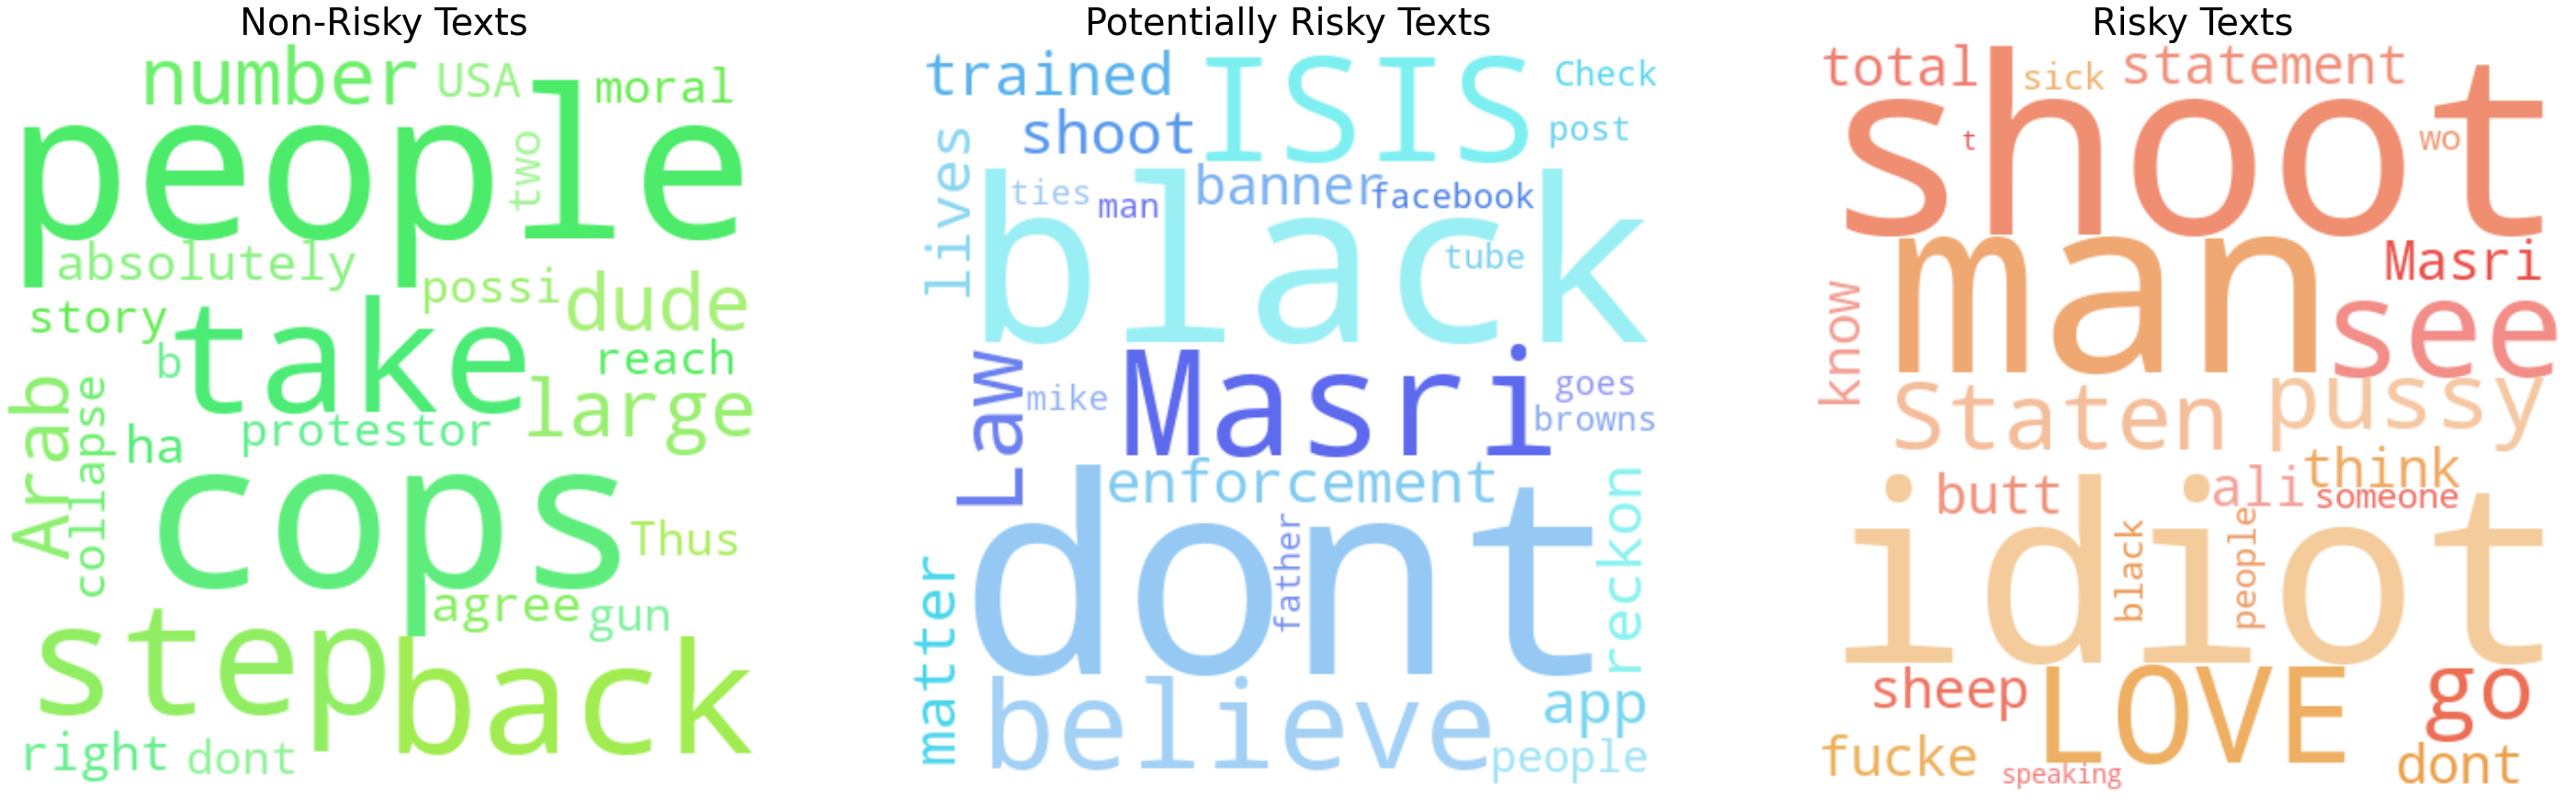

In [66]:

import random
#creating the wordcloud of non risky, potentially risky and risky texts
def green_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(85, 140), random.randint(60, 80))

def red_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(0, 35), random.randint(60, 80))

def blue_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(180, 240), random.randint(60, 80))
    
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=[50, 35])
#word cloud for non risky
wordcloud1 = WordCloud(background_color='white', height=400,max_words=25).generate((str(non_risky['text'][:10])))
ax1.imshow(wordcloud1.recolor(color_func=green_color, random_state=3),interpolation="bilinear")
ax1.axis('off');
ax1.set_title('Non-Risky Texts', fontsize=40);
#word cloud for potentially risky
wordcloud2 = WordCloud(background_color='white', height=400,max_words=25).generate((str(potentially_risky['text'][:10])))
ax2.imshow(wordcloud2.recolor(color_func=blue_color, random_state=3),interpolation="bilinear")
ax2.axis('off');
ax2.set_title('Potentially Risky Texts', fontsize=40);
#word cloud for Risky
wordcloud3 = WordCloud(background_color='white', height=400,max_words=25).generate((str(risky['text'][:10])))
ax3.imshow(wordcloud3.recolor(color_func=red_color, random_state=3),interpolation="bilinear")
ax3.axis('off');
ax3.set_title('Risky Texts', fontsize=40);


